 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.2%20informative%20priors%20hardcoded%20data%20--%20analysis.ipynb#Load-in-stan-results" data-toc-modified-id="Load-in-stan-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load in stan results</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.2%20informative%20priors%20hardcoded%20data%20--%20analysis.ipynb#Load-in-cibersort-and-ground-truth" data-toc-modified-id="Load-in-cibersort-and-ground-truth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load in cibersort and ground truth</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.2%20informative%20priors%20hardcoded%20data%20--%20analysis.ipynb#Convergence-checks." data-toc-modified-id="Convergence-checks.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convergence checks.</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.2%20informative%20priors%20hardcoded%20data%20--%20analysis.ipynb#get-the-full-deconvolution-distributions" data-toc-modified-id="get-the-full-deconvolution-distributions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>get the full deconvolution distributions</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.2%20informative%20priors%20hardcoded%20data%20--%20analysis.ipynb#Plot" data-toc-modified-id="Plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.2%20informative%20priors%20hardcoded%20data%20--%20analysis.ipynb#Traceplots-and-correlation-matrix" data-toc-modified-id="Traceplots-and-correlation-matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Traceplots and correlation matrix</a></span></li><li><span><a href="http://localhost:58235/notebooks/work/model-single-origin-samples/2.2.2%20informative%20priors%20hardcoded%20data%20--%20analysis.ipynb#Cibersort's-diagnostics" data-toc-modified-id="Cibersort's-diagnostics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cibersort's diagnostics</a></span></li></ul></div>

In [1]:
PLOT_DIR = 'plots/2.2.2/'

In [2]:
import numpy as np
import matplotlib as mpl
import data
import models
import cache
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pystan
from time import time
from datetime import timedelta
import pickle
import dill

INFO:stancache.seed:Setting seed to 1245502385
INFO:root:Setting CACHE_DIR = /home/jovyan/modelcache/mz
INFO:stancache.seed:Setting seed to 1245502385


In [3]:
# verify kernel won't crash due to MKL issue from future imports
import sklearn.linear_model.tests.test_randomized_l1

# Load in stan results

This time, pystan didn't error out, so we do have the `stanfit` object pickled out.

But to maintain a consistent pipeline, let's still use cmdstan:

In [4]:
# remove the file first, because otherwise it appends

!rm logs/stansummary.informative_hardcoded_priors.csv;

!stansummary --csv_file=logs/stansummary.informative_hardcoded_priors.csv \
logs/informative_hardcoded_priors_sampling_log.txt_0.csv \
logs/informative_hardcoded_priors_sampling_log.txt_1.csv \
logs/informative_hardcoded_priors_sampling_log.txt_2.csv \
logs/informative_hardcoded_priors_sampling_log.txt_3.csv > /dev/null;

rm: cannot remove 'logs/stansummary.informative_hardcoded_priors.csv': No such file or directory


In [5]:
stan_summary = pd.read_csv('logs/stansummary.informative_hardcoded_priors.csv', comment='#')
stan_summary.head()

,name,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
0,lp__,-74743.800000,620.202000,15460.400000,-73830.700000,-73506.900000,-73215.700000,621.406,0.010253,1.003260
1,accept_stat__,0.815375,0.002090,0.186947,0.446025,0.871844,0.993821,8000.000,0.131991,1.019140
2,stepsize__,0.008429,0.001857,0.143624,0.002614,0.004260,0.007165,5981.540,0.098689,0.999965
3,treedepth__,9.887500,0.033230,0.934587,10.000000,10.000000,10.000000,791.022,0.013051,1.007930
4,n_leapfrog__,1006.420000,4.726570,122.259000,1023.000000,1023.000000,1023.000000,669.070,0.011039,1.010400


In [6]:
stan_data = pickle.load(open('2.2_hardcoded-as-data_informative_priors_standata.pkl', 'rb'))

In [7]:
colnames = stan_data['x2'].columns
colnames

Index(['SubSet[B_CD5]', 'SubSet[B_Memory]', 'SubSet[B_Naive]',
       'SubSet[CD4_Central_Memory]', 'SubSet[CD4_Effector_Memory]',
       'SubSet[CD4_Naive]', 'SubSet[CD4_Th1]', 'SubSet[CD4_Th17]',
       'SubSet[CD4_Th2]', 'SubSet[CD4_Treg]', 'SubSet[CD8_Central_Memory]',
       'SubSet[CD8_Effector]', 'SubSet[CD8_Naive]'],
      dtype='object')

In [8]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]

,name,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
10381,"sample2_x[1,1]",0.727500,0.294496,0.422048,0.000991,0.978985,0.990468,2.05384,0.000034,6.093100
10382,"sample2_x[1,2]",0.031438,0.034901,0.055007,0.000203,0.003079,0.151499,2.48402,0.000041,2.128740
10383,"sample2_x[1,3]",0.227841,0.260661,0.373076,0.000605,0.009697,0.913351,2.04853,0.000034,6.230710
10384,"sample2_x[1,4]",0.001098,0.000120,0.004174,0.000053,0.000629,0.002721,1209.28000,0.019952,1.001940
10385,"sample2_x[1,5]",0.001122,0.000176,0.005553,0.000044,0.000571,0.002510,999.47300,0.016490,1.001710
10386,"sample2_x[1,6]",0.001432,0.000482,0.011590,0.000030,0.000376,0.001665,579.37900,0.009559,1.004040
10387,"sample2_x[1,7]",0.001338,0.000183,0.006319,0.000052,0.000724,0.003242,1194.83000,0.019713,1.001780
10388,"sample2_x[1,8]",0.001761,0.000373,0.010715,0.000056,0.000753,0.003227,823.13200,0.013581,1.002370
10389,"sample2_x[1,9]",0.002515,0.001064,0.021646,0.000045,0.000601,0.002634,414.25200,0.006835,1.006190
10390,"sample2_x[1,10]",0.001158,0.000191,0.005378,0.000045,0.000564,0.002491,790.96300,0.013050,1.002940


# Load in cibersort and ground truth

In [9]:
[
    _, #merged_samples,
    cleaner_gt,
    friendly_mixture_descriptions,
    example_result,
    cib_class_names,
    rollup_groundtruth,
    rollupsums_df,
    col_order,
    rollups
] = pickle.load(open('/modelcache/experiments/tmp_2.1.1_plotting.pkl', 'rb'))

In [10]:
sns.set_style('darkgrid')

# Convergence checks.

In [11]:
!echo mkdir -p $PLOT_DIR
!mkdir -p $PLOT_DIR

mkdir -p plots/2.2.2/


In [12]:
def savefig(fig, *args, **kwargs):
    """
    Wrap figure.savefig defaulting to tight bounding box.
    From https://github.com/mwaskom/seaborn/blob/dfdd1126626f7ed0fe3737528edecb71346e9eb0/seaborn/axisgrid.py#L1840
    """
    kwargs.setdefault("bbox_inches", "tight")
    fig.savefig(*args, **kwargs)

In [13]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat']

10381    6.093100
10382    2.128740
10383    6.230710
10384    1.001940
10385    1.001710
10386    1.004040
10387    1.001780
10388    1.002370
10389    1.006190
10390    1.002940
10391    1.001460
10392    1.003390
10393    1.005910
10394    7.288140
10395    5.567450
10396    5.903420
10397    1.001290
10398    1.002010
10399    1.004350
10400    1.001290
10401    1.003190
10402    1.006180
10403    1.003100
10404    1.001340
10405    1.003950
10406    1.002260
10407    7.073490
10408    4.125190
10409    6.651410
10410    1.001510
           ...   
10481    1.016800
10482    1.006700
10483    1.007280
10484    1.012320
10485    1.063690
10486    1.097320
10487    1.028010
10488    1.266200
10489    1.003510
10490    1.025860
10491    0.999785
10492    1.002640
10493    1.002720
10494    1.000100
10495    1.017960
10496    1.005480
10497    1.000520
10498    1.009640
10499    1.135780
10500    1.091100
10501    1.145750
10502    1.002780
10503    1.021090
10504    1.001670
10505    1

In [14]:
# if this isn't true, stansummary failed (perhaps we ran it twice and appended)
assert stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat'].dtype == 'float64'

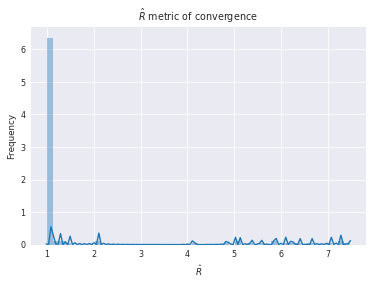

In [15]:
# convergence rhats


with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4))
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat'])
    #plt.title('Unknown mixture fraction estimates -- Rhat distribution')
    plt.title('$\hat{R}$ metric of convergence')
    plt.ylabel('Frequency')
    plt.xlabel('$\hat{R}$')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'Rhat_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'Rhat_sample2-x_dist.png', dpi=300)

In [16]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat'].astype(float).describe()

count    130.000000
mean       1.652156
std        1.681823
min        0.999785
25%        1.002345
50%        1.004045
75%        1.018215
max        7.463800
Name: R_hat, dtype: float64

median 790.8905
mean 1962.60353031
min 2.0333


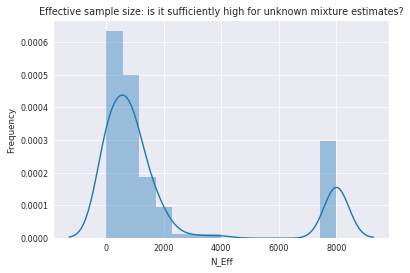

In [17]:
# convergence - N_eff

with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4)) # 8,6
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'])
    # Unknown mixture fraction estimates: effective sample size distribution
    plt.title('Effective sample size: is it sufficiently high for unknown mixture estimates?')

    print('median', stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'].median())
    print('mean', stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'].mean())
    print('min', stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'].min())

    plt.ylabel('Frequency')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'Neff_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'Neff_sample2-x_dist.png', dpi=300)

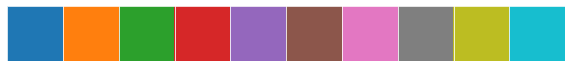

In [18]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

median 0.000533894
mean 0.0310153397346


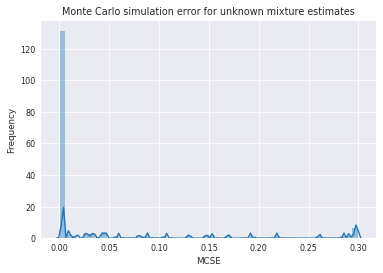

In [20]:
# convergence -- MCSE 
with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4))
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'],
                 #kde_kws={'color':sns.color_palette()[2]}
                )
    #plt.axvline(x=stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'].median(),
    #            linestyle='dotted', lw=2.5, color=sns.color_palette()[2])
    print('median', stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'].median())
    print('mean', stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'].mean())
    #plt.title('Unknown mixture fraction estimates: Monte Carlo error distribution')
    plt.title('Monte Carlo simulation error for unknown mixture estimates')
    plt.ylabel('Frequency')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'MCSE_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'MCSE_sample2-x_dist.png', dpi=300)

median 0.027037699999999998
mean 0.0655902556923


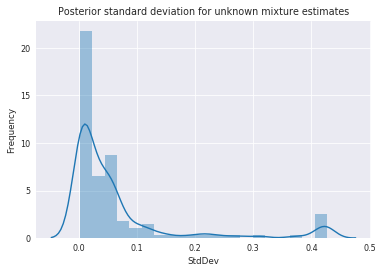

In [22]:
# convergence -- standard deviation
with sns.plotting_context('paper'):
    f2 = plt.figure(figsize=(6,4))
    sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'])
    # plt.axvline(x=stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].median(),
    #             linestyle='dotted', lw=2.5, color=sns.color_palette()[2])
    print('median', stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].median())
    print('mean', stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].mean())
    plt.title('Posterior standard deviation for unknown mixture estimates')
    plt.ylabel('Frequency')
    #f2 = plt.gcf()
    savefig(f2, PLOT_DIR+'StdDev_sample2-x_dist.pdf', dpi=300)
    savefig(f2, PLOT_DIR+'StdDev_sample2-x_dist.png', dpi=300)

In [23]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'].describe()

count    130.000000
mean       0.065590
std        0.105541
min        0.001725
25%        0.004990
50%        0.027038
75%        0.060500
max        0.426588
Name: StdDev, dtype: float64

# get the full deconvolution distributions

In [24]:
# have to load in the full traces
cols_we_want = stan_summary[stan_summary.name.str.startswith('sample2_x')].name.values
cols_we_want

array(['sample2_x[1,1]', 'sample2_x[1,2]', 'sample2_x[1,3]',
       'sample2_x[1,4]', 'sample2_x[1,5]', 'sample2_x[1,6]',
       'sample2_x[1,7]', 'sample2_x[1,8]', 'sample2_x[1,9]',
       'sample2_x[1,10]', 'sample2_x[1,11]', 'sample2_x[1,12]',
       'sample2_x[1,13]', 'sample2_x[2,1]', 'sample2_x[2,2]',
       'sample2_x[2,3]', 'sample2_x[2,4]', 'sample2_x[2,5]',
       'sample2_x[2,6]', 'sample2_x[2,7]', 'sample2_x[2,8]',
       'sample2_x[2,9]', 'sample2_x[2,10]', 'sample2_x[2,11]',
       'sample2_x[2,12]', 'sample2_x[2,13]', 'sample2_x[3,1]',
       'sample2_x[3,2]', 'sample2_x[3,3]', 'sample2_x[3,4]',
       'sample2_x[3,5]', 'sample2_x[3,6]', 'sample2_x[3,7]',
       'sample2_x[3,8]', 'sample2_x[3,9]', 'sample2_x[3,10]',
       'sample2_x[3,11]', 'sample2_x[3,12]', 'sample2_x[3,13]',
       'sample2_x[4,1]', 'sample2_x[4,2]', 'sample2_x[4,3]',
       'sample2_x[4,4]', 'sample2_x[4,5]', 'sample2_x[4,6]',
       'sample2_x[4,7]', 'sample2_x[4,8]', 'sample2_x[4,9]',
       'samp

In [25]:
cols_we_want_renamed  = [c.replace('[', '.').replace(']', '').replace(',', '.') for c in cols_we_want]
cols_we_want_renamed

['sample2_x.1.1',
 'sample2_x.1.2',
 'sample2_x.1.3',
 'sample2_x.1.4',
 'sample2_x.1.5',
 'sample2_x.1.6',
 'sample2_x.1.7',
 'sample2_x.1.8',
 'sample2_x.1.9',
 'sample2_x.1.10',
 'sample2_x.1.11',
 'sample2_x.1.12',
 'sample2_x.1.13',
 'sample2_x.2.1',
 'sample2_x.2.2',
 'sample2_x.2.3',
 'sample2_x.2.4',
 'sample2_x.2.5',
 'sample2_x.2.6',
 'sample2_x.2.7',
 'sample2_x.2.8',
 'sample2_x.2.9',
 'sample2_x.2.10',
 'sample2_x.2.11',
 'sample2_x.2.12',
 'sample2_x.2.13',
 'sample2_x.3.1',
 'sample2_x.3.2',
 'sample2_x.3.3',
 'sample2_x.3.4',
 'sample2_x.3.5',
 'sample2_x.3.6',
 'sample2_x.3.7',
 'sample2_x.3.8',
 'sample2_x.3.9',
 'sample2_x.3.10',
 'sample2_x.3.11',
 'sample2_x.3.12',
 'sample2_x.3.13',
 'sample2_x.4.1',
 'sample2_x.4.2',
 'sample2_x.4.3',
 'sample2_x.4.4',
 'sample2_x.4.5',
 'sample2_x.4.6',
 'sample2_x.4.7',
 'sample2_x.4.8',
 'sample2_x.4.9',
 'sample2_x.4.10',
 'sample2_x.4.11',
 'sample2_x.4.12',
 'sample2_x.4.13',
 'sample2_x.5.1',
 'sample2_x.5.2',
 'sample2_x.

In [26]:
all_traces = []
for i in range(4):
    print('loading:', i)
    trace_i = pd.read_csv('logs/informative_hardcoded_priors_sampling_log.txt_%d.csv' % i, comment='#', usecols=cols_we_want_renamed)
    trace_i['trace_id'] = i
    trace_i['iter'] = trace_i.index
    all_traces.append(trace_i)

loading: 0
loading: 1
loading: 2
loading: 3


In [27]:
all_traces_df = pd.concat(all_traces)
print(all_traces_df.shape)
all_traces_df.head()

(8000, 132)


,sample2_x.1.1,sample2_x.2.1,sample2_x.3.1,sample2_x.4.1,sample2_x.5.1,sample2_x.6.1,sample2_x.7.1,sample2_x.8.1,sample2_x.9.1,sample2_x.10.1,...,sample2_x.3.13,sample2_x.4.13,sample2_x.5.13,sample2_x.6.13,sample2_x.7.13,sample2_x.8.13,sample2_x.9.13,sample2_x.10.13,trace_id,iter
0,0.016959,0.089704,0.162042,0.101518,0.073840,0.238579,0.038821,0.141445,0.092243,0.142719,...,0.090519,0.025584,0.022048,0.103313,0.171208,0.078601,0.021326,0.176739,0,0
1,0.016959,0.089704,0.162042,0.101518,0.073840,0.238579,0.038821,0.141445,0.092243,0.142719,...,0.090519,0.025584,0.022048,0.103313,0.171208,0.078601,0.021326,0.176739,0,1
2,0.016959,0.089704,0.162042,0.101518,0.073840,0.238579,0.038821,0.141445,0.092243,0.142719,...,0.090519,0.025584,0.022048,0.103313,0.171208,0.078601,0.021326,0.176739,0,2
3,0.016959,0.089704,0.162042,0.101518,0.073840,0.238579,0.038821,0.141445,0.092243,0.142719,...,0.090519,0.025584,0.022048,0.103313,0.171208,0.078601,0.021326,0.176739,0,3
4,0.042603,0.210232,0.115432,0.181094,0.123931,0.075380,0.119901,0.110128,0.174828,0.180652,...,0.090108,0.025096,0.024520,0.101031,0.096389,0.081262,0.029771,0.119904,0,4


In [28]:
all_traces_df2 = pd.melt(all_traces_df, id_vars=['iter','trace_id'], value_name='estimate', var_name='variable')
all_traces_df2.head()

,iter,trace_id,variable,estimate
0,0,0,sample2_x.1.1,0.016959
1,1,0,sample2_x.1.1,0.016959
2,2,0,sample2_x.1.1,0.016959
3,3,0,sample2_x.1.1,0.016959
4,4,0,sample2_x.1.1,0.042603


In [29]:
var_ids = all_traces_df2.variable.str.extract('sample2_x.(?P<sample_id>\d+).(?P<subset_id>\d+)')
var_ids.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,sample_id,subset_id
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [30]:
all_traces_df3= pd.concat([all_traces_df2, var_ids], axis=1) 
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id
0,0,0,sample2_x.1.1,0.016959,1,1
1,1,0,sample2_x.1.1,0.016959,1,1
2,2,0,sample2_x.1.1,0.016959,1,1
3,3,0,sample2_x.1.1,0.016959,1,1
4,4,0,sample2_x.1.1,0.042603,1,1


In [31]:
all_traces_df3['subset_id'] = all_traces_df3['subset_id'].astype(int)
all_traces_df3['sample_id'] = all_traces_df3['sample_id'].astype(int)

In [32]:
sample2_xs = stan_summary[stan_summary.name.str.startswith('sample2_x')]['Mean'].values.reshape(10, 13)
sample2_xs.shape

mixture_estimates = pd.DataFrame(sample2_xs, columns=colnames)
mixture_estimates

import re
subset_names = [re.sub(string=x, pattern='(.*)\[(.*)\]', repl='\\2') for x in mixture_estimates.columns]
subset_names

['B_CD5',
 'B_Memory',
 'B_Naive',
 'CD4_Central_Memory',
 'CD4_Effector_Memory',
 'CD4_Naive',
 'CD4_Th1',
 'CD4_Th17',
 'CD4_Th2',
 'CD4_Treg',
 'CD8_Central_Memory',
 'CD8_Effector',
 'CD8_Naive']

In [33]:
all_traces_df3['subset_name'] = all_traces_df3.subset_id.apply(lambda i: subset_names[i-1])
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name
0,0,0,sample2_x.1.1,0.016959,1,1,B_CD5
1,1,0,sample2_x.1.1,0.016959,1,1,B_CD5
2,2,0,sample2_x.1.1,0.016959,1,1,B_CD5
3,3,0,sample2_x.1.1,0.016959,1,1,B_CD5
4,4,0,sample2_x.1.1,0.042603,1,1,B_CD5


In [34]:
# IMPORTANT: drop the warmup samples!!!!!
warmup = 1000
# this should show a wide range
#all_traces_df3.iter.hist()
all_traces_df3.iter.describe()[['min', 'max']]

min       0.0
max    1999.0
Name: iter, dtype: float64

In [35]:
# drop warmups
all_traces_df3 = all_traces_df3.loc[all_traces_df3['iter']>=1000,]
all_traces_df3['iter'] -= 1000
# this should be better now
#all_traces_df3.iter.hist()
all_traces_df3.iter.describe()[['min', 'max']]

min      0.0
max    999.0
Name: iter, dtype: float64

In [36]:
# combine iteration numbers across traces -- i.e. line them up from 0 to 4000, not 4 versions of 0 to 1000
#(all_traces_df3['trace_id']*1000 + all_traces_df3['iter']).hist()
(all_traces_df3['trace_id']*1000 + all_traces_df3['iter']).describe()[['min', 'max']]

min       0.0
max    3999.0
dtype: float64

In [37]:
all_traces_df3['combined_iter_number'] = (all_traces_df3['trace_id']*1000 + all_traces_df3['iter'])

In [38]:
assert all_traces_df3.shape[0] / 10 / 13 / 4 == 1000.

# Plot

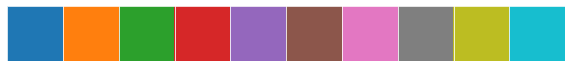

In [39]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [40]:
subset_names, cib_class_names

(['B_CD5',
  'B_Memory',
  'B_Naive',
  'CD4_Central_Memory',
  'CD4_Effector_Memory',
  'CD4_Naive',
  'CD4_Th1',
  'CD4_Th17',
  'CD4_Th2',
  'CD4_Treg',
  'CD8_Central_Memory',
  'CD8_Effector',
  'CD8_Naive'],
 ['B_CD5',
  'B_Memory',
  'B_Naive',
  'CD4_Central_Memory',
  'CD4_Effector_Memory',
  'CD4_Naive',
  'CD4_Th1',
  'CD4_Th17',
  'CD4_Th2',
  'CD4_Treg',
  'CD8_Central_Memory',
  'CD8_Effector',
  'CD8_Naive'])

In [ ]:
# # Roll up by cell type

rollups = {
    'B': subset_names[:3],
    'CD4 T': subset_names[3:10],
    'CD8 T': subset_names[10:]
}
rollups = {
    'B': [c for c in cib_class_names if c.startswith('B_')],
    'CD4 T': [c for c in cib_class_names if c.startswith('CD4_')],
    'CD8 T': [c for c in cib_class_names if c.startswith('CD8_')]
}
rollups

In [41]:
def label_rollup(rollups, x):
    for key in rollups.keys():
        if x in rollups[key]:
            return key
    return None

In [42]:
all_traces_df3['rollup'] = all_traces_df3.subset_name.apply(lambda x: label_rollup(rollups, x))

all_traces_df3.rollup.value_counts()

CD4 T    280000
CD8 T    120000
B        120000
Name: rollup, dtype: int64

In [43]:
samples_rolledup = all_traces_df3.groupby(['sample_id', 'combined_iter_number', 'rollup']).estimate.sum().reset_index()
samples_rolledup.head()

,sample_id,combined_iter_number,rollup,estimate
0,1,0,B,0.990048
1,1,0,CD4 T,0.007181
2,1,0,CD8 T,0.002772
3,1,1,B,0.994178
4,1,1,CD4 T,0.003931


In [44]:
# now roll up ground truth: sum the subset fractions for every sample into B, CD8 T, CD4 groups:

groundtruth_df = stan_data['x2'].copy()
groundtruth_df['mixID'] = range(len(groundtruth_df))
groundtruth_df

,SubSet[B_CD5],SubSet[B_Memory],SubSet[B_Naive],SubSet[CD4_Central_Memory],SubSet[CD4_Effector_Memory],SubSet[CD4_Naive],SubSet[CD4_Th1],SubSet[CD4_Th17],SubSet[CD4_Th2],SubSet[CD4_Treg],SubSet[CD8_Central_Memory],SubSet[CD8_Effector],SubSet[CD8_Naive],mixID
0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
0,0.0,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
0,0.0,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,3
0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4
0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,5
0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,6
0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,7
0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,8
0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,9


In [45]:
groundtruth_df_2 = pd.melt(groundtruth_df, id_vars=['mixID'], var_name='subset', value_name='estimate')
print(groundtruth_df_2.shape)
groundtruth_df_2['subset'] = groundtruth_df_2['subset'].apply(lambda x: re.sub(string=x, pattern='(.*)\[(.*)\]', repl='\\2'))
groundtruth_df_2['rollup'] = groundtruth_df_2.subset.apply(lambda x: label_rollup(rollups, x))
groundtruth_df_2.head()

(130, 3)


,mixID,subset,estimate,rollup
0,0,B_CD5,0.0,B
1,1,B_CD5,0.0,B
2,2,B_CD5,0.0,B
3,3,B_CD5,0.0,B
4,4,B_CD5,0.0,B


In [46]:
rollup_groundtruth = groundtruth_df_2.groupby(['mixID', 'rollup']).estimate.sum().reset_index()
rollup_groundtruth.head()

,mixID,rollup,estimate
0,0,B,1.0
1,0,CD4 T,0.0
2,0,CD8 T,0.0
3,1,B,1.0
4,1,CD4 T,0.0


In [47]:
# cibersort results
rollupsums_df.head()

,B,CD4 T,CD8 T
0,0.733192,0.156393,0.110415
1,0.873172,0.104869,0.021959
2,0.742666,0.171586,0.085748
3,0.831617,0.139056,0.029327
4,0.756919,0.086678,0.156404


In [48]:
cleaner_traces = all_traces_df3.copy()
cleaner_traces['subset_name'] = cleaner_traces['subset_name'].str.replace(
    '_', ' ')
cleaner_traces['subset_name'].value_counts()

cleaner_gt = stan_data['x2'].rename(
    columns=
    lambda x: x.replace('_', ' ').replace('SubSet[', '').replace(']', ''))
cleaner_gt.columns

Index(['B CD5', 'B Memory', 'B Naive', 'CD4 Central Memory',
       'CD4 Effector Memory', 'CD4 Naive', 'CD4 Th1', 'CD4 Th17', 'CD4 Th2',
       'CD4 Treg', 'CD8 Central Memory', 'CD8 Effector', 'CD8 Naive'],
      dtype='object')

In [49]:
cleaner_traces.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name,combined_iter_number,rollup
1000,0,0,sample2_x.1.1,0.986074,1,1,B CD5,0,B
1001,1,0,sample2_x.1.1,0.978918,1,1,B CD5,1,B
1002,2,0,sample2_x.1.1,0.988595,1,1,B CD5,2,B
1003,3,0,sample2_x.1.1,0.983390,1,1,B CD5,3,B
1004,4,0,sample2_x.1.1,0.982799,1,1,B CD5,4,B


In [50]:
samples_rolledup.head()

,sample_id,combined_iter_number,rollup,estimate
0,1,0,B,0.990048
1,1,0,CD4 T,0.007181
2,1,0,CD8 T,0.002772
3,1,1,B,0.994178
4,1,1,CD4 T,0.003931


In [51]:
merged_samples_1 = cleaner_traces[['sample_id', 'combined_iter_number', 'subset_name', 'estimate']].copy()
merged_samples_1['type'] = 'subset'
merged_samples_2 = samples_rolledup.copy()
merged_samples_2.columns = [c.replace('rollup', 'subset_name') for c in merged_samples_2.columns]
merged_samples_2['type'] = 'rollup'
merged_samples = pd.concat([merged_samples_1, merged_samples_2])
merged_samples.type.value_counts()

subset    520000
rollup    120000
Name: type, dtype: int64

In [52]:
#sns.set_context('paper')
sns.set_style("darkgrid")

In [53]:
def extract_values_for_mixture_by_id(key):
    """
    key: 1-indexed, meaning mixture 1 to mixture 10
    
    based on:
    for (key, grp), \
            (_, groundtruth_base), \
            friendly_title, \
            (_, cib_vals_base), \
            (mixID_rolledup, groundtruth_rolledup), \
            (_, cib_vals_rolledup) in zip(merged_samples.groupby('sample_id'),
                                          cleaner_gt.iterrows(),
                                          #friendly_mixture_descriptions2,
                                          friendly_mixture_descriptions,
                                          example_result[cib_class_names].iterrows(),
                                          rollup_groundtruth.groupby('mixID'),
                                          rollupsums_df.iterrows()
    """
    grp = merged_samples[merged_samples['sample_id'] == key]
    groundtruth_base = cleaner_gt.iloc[key-1]
    cib_vals_base = example_result[cib_class_names].iloc[key-1]
    groundtruth_rolledup = rollup_groundtruth[rollup_groundtruth['mixID'] == key-1]
    cib_vals_rolledup = rollupsums_df.iloc[key-1]
    
    return (key, grp, groundtruth_base, cib_vals_base, groundtruth_rolledup, cib_vals_rolledup)

In [54]:
def plot_single_mixture_results(mixture_info, friendly_title):
    #flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # http://seaborn.pydata.org/tutorial/color_palettes.html
    #sns.palplot(flatui)
    paired_colors = sns.color_palette("Paired_r", 12)
    #sns.palplot(paired_colors)
    
    (key, grp, groundtruth_base, cib_vals_base, groundtruth_rolledup, cib_vals_rolledup) = mixture_info

    with sns.plotting_context('paper'):
        f, ax = plt.subplots( figsize=(12,8))
        g = sns.boxplot(data = grp,
                       y='subset_name',
                       x='estimate',
                       ax=ax,
                       hue='type',
                       order=col_order,
                        # some additional parameters that we think may help:
                        saturation=1,
                        linewidth=1, # not sure about this one
                        dodge=False, # avoid hue nesting
                       #palette=[flatui[0], flatui[1]]
                        palette=paired_colors[0:2]
                       )
        g.set_title(friendly_title) 

        # ground truth
        gt1 = pd.DataFrame(groundtruth_base).reset_index()
        gt1.columns = ['rollup', 'estimate']
        gt1['type'] = 'subset'
        gt2 = groundtruth_rolledup[['rollup', 'estimate']].copy()
        gt2['type'] = 'rollup'
        gt = pd.concat([gt1, gt2])

        sns.stripplot(
            x="estimate",
            y="rollup",
            data=gt,
            hue='type',
            order=col_order,
            linewidth=0,
            size=15,
            alpha=.9,
            marker=(5, 1),
            #palette=[flatui[5], flatui[3]],
            palette=paired_colors[2:4],
            zorder=5,
            jitter=False,
            label='Ground Truth' # https://github.com/mwaskom/seaborn/issues/940 -- without this line, the stars aren't shown in legend entries made by "hue" param; instead you get a ton of dupe Ground Truth star labels
        )

        # add cibersort points
        cb_base = pd.DataFrame(cib_vals_base).reset_index()
        cb_base.columns = ['SubSet', 'estimate']
        cb_base['type'] = 'subset'

        cb_rolledup = pd.DataFrame(cib_vals_rolledup).reset_index()
        cb_rolledup.columns = ['SubSet', 'estimate']
        cb_rolledup['type'] = 'rollup'

        cb = pd.concat([cb_base, cb_rolledup])
        cb.SubSet = cb.SubSet.str.replace('_', ' ') # normalize names

        sns.stripplot(
            x="estimate",
            y="SubSet",
            data=cb,
            hue='type',
            order=col_order,
            linewidth=0,
            size=15,
            alpha=.9,
            marker=(3, 0),
            #palette=[flatui[2], flatui[4]],
            palette=paired_colors[4:6],
            zorder=6,
            jitter=False,
            label='Cibersort' # see above again re this label parameter
        )

        g.set_xlabel('Mixture proportion')
        g.set_ylabel('Cell type')
        g.set_xbound(0, 1)

        # show legend, and subselect because stripplot adds one legend item per point it appears
        handles, labels = ax.get_legend_handles_labels()
        """
        want legend items:
        * infino samples: items 0, 1
        * ground truth stars: items 2, 3
        * cibersort triangles: items 2+len(col_order)+2, 2+len(col_order)+2+1
        """
        chosen_idx = [1,0, 2,3, 2+len(col_order)+2, 2+len(col_order)+2+1]
        chosen_handles = [handles[i] for i in chosen_idx]
        #chosen_labels = [labels[i] for i in chosen_idx]
        chosen_labels = ['Infino (sums)', 'Infino', 'Ground Truth (sums)', 'Ground Truth', 'Cibersort (sums)', 'Cibersort']
        legend = ax.legend(
            chosen_handles,
            chosen_labels,
            loc='lower right',
            frameon=True)
        frame = legend.get_frame()
        frame.set_edgecolor('red')
        frame.set_facecolor('white')

        # shade background
        #fill1 = plt.axhspan('B', 'CD4 T', facecolor='0.5', alpha=0.5)
        fill1 = plt.axhspan(-0.5, 3.5, facecolor='0.8', alpha=0.3)
        fill3 = plt.axhspan(11.5, 15.5, facecolor='0.8', alpha=0.3)

        # improve label format
        # https://stackoverflow.com/a/34426167/130164
        for label in ax.get_yticklabels():
            if label.get_text() in rollups.keys():
                label.set_size(15)
                label.set_backgroundcolor("yellow")
                label.set_weight("bold")
                label.set_color("red")
            else:
                label.set_fontstyle("italic")
                label.set_weight("bold")


        return f,ax
        

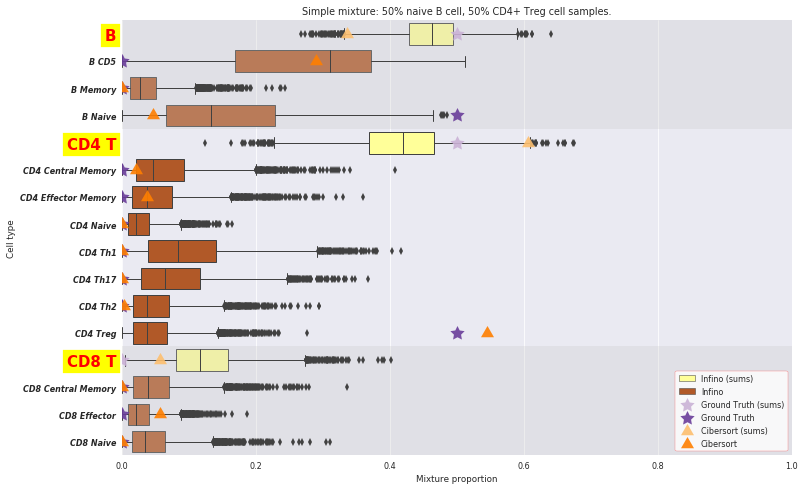

In [55]:
f,ax = plot_single_mixture_results(extract_values_for_mixture_by_id(7),
                                   'Simple mixture: 50% naive B cell, 50% CD4+ Treg cell samples.')
savefig(f, PLOT_DIR+'fig1b.png', dpi=300)
savefig(f, PLOT_DIR+'fig1b.pdf', dpi=300)

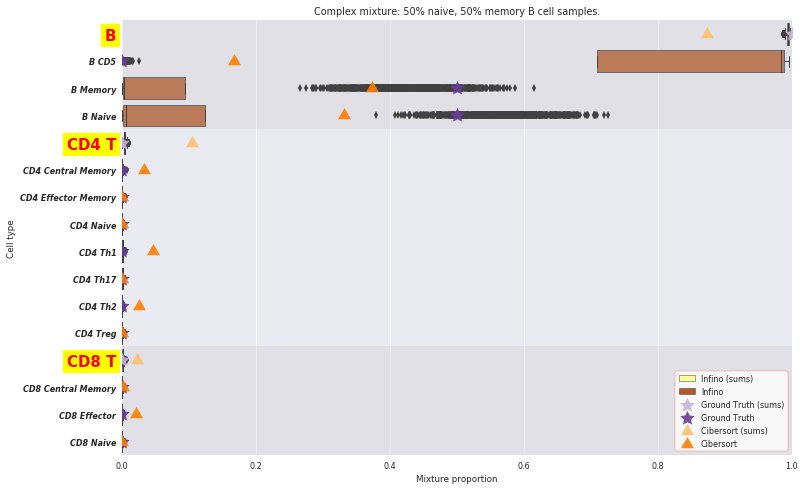

In [56]:
f,ax = plot_single_mixture_results(extract_values_for_mixture_by_id(2),
                                   'Complex mixture: 50% naive, 50% memory B cell samples.')
savefig(f, PLOT_DIR+'fig1c.png', dpi=300)
savefig(f, PLOT_DIR+'fig1c.pdf', dpi=300)

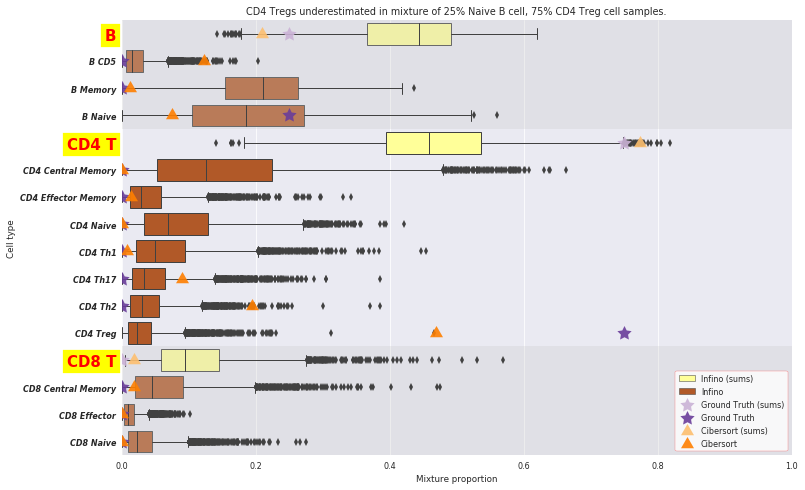

In [57]:
f,ax = plot_single_mixture_results(extract_values_for_mixture_by_id(10),
                                   'CD4 Tregs underestimated in mixture of 25% Naive B cell, 75% CD4 Treg cell samples.')
savefig(f, PLOT_DIR+'fig1e.png', dpi=300)
savefig(f, PLOT_DIR+'fig1e.pdf', dpi=300)

# Traceplots and correlation matrix

In [58]:
# # traceplots

# see https://github.com/stan-dev/pystan/blob/develop/pystan/plots.py
# see https://github.com/stan-dev/pystan/blob/develop/pystan/stanfit4model.pyx#L487
# see https://pymc-devs.github.io/pymc3/notebooks/getting_started.html#Posterior-analysis
# see https://github.com/pymc-devs/pymc3/blob/master/pymc3/plots/traceplot.py
from pystan.external.pymc import plots
# actually this imports https://github.com/stan-dev/pystan/blob/develop/pystan/external/pymc/plots.py


all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name,combined_iter_number,rollup
1000,0,0,sample2_x.1.1,0.986074,1,1,B_CD5,0,B
1001,1,0,sample2_x.1.1,0.978918,1,1,B_CD5,1,B
1002,2,0,sample2_x.1.1,0.988595,1,1,B_CD5,2,B
1003,3,0,sample2_x.1.1,0.983390,1,1,B_CD5,3,B
1004,4,0,sample2_x.1.1,0.982799,1,1,B_CD5,4,B


In the following traceplots, note that we ensure above that we don't use the index column as x axis, and instead use iter. that way the chains are combined.

(0, 1)

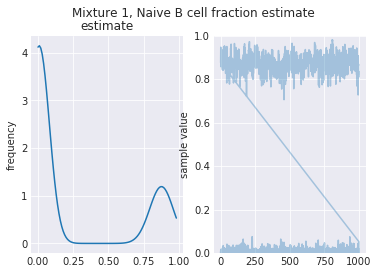

In [59]:
g = plots.traceplot(
    all_traces_df3[(all_traces_df3['sample_id'] == 1)
                   & (all_traces_df3['subset_name'] == 'B_Naive')].set_index(
                       'iter')[['estimate']],
    vars=['estimate'])
g.suptitle('Mixture 1, Naive B cell fraction estimate')
g.gca().set_ylim(0, 1)

(0, 1)

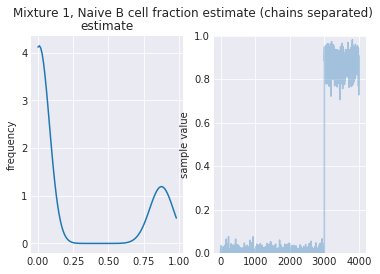

In [60]:
# break out by chain to demonstrate how chains aren't converging
# how: set_index() to combined_iter_number instead of iter

g = plots.traceplot(
    all_traces_df3[(all_traces_df3['sample_id'] == 1)
                   & (all_traces_df3['subset_name'] == 'B_Naive')].set_index(
                       'combined_iter_number')[['estimate']],
    vars=['estimate'])
g.suptitle('Mixture 1, Naive B cell fraction estimate (chains separated)')
g.gca().set_ylim(0, 1)

(<matplotlib.figure.Figure at 0x7f72139400b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7213934cf8>)

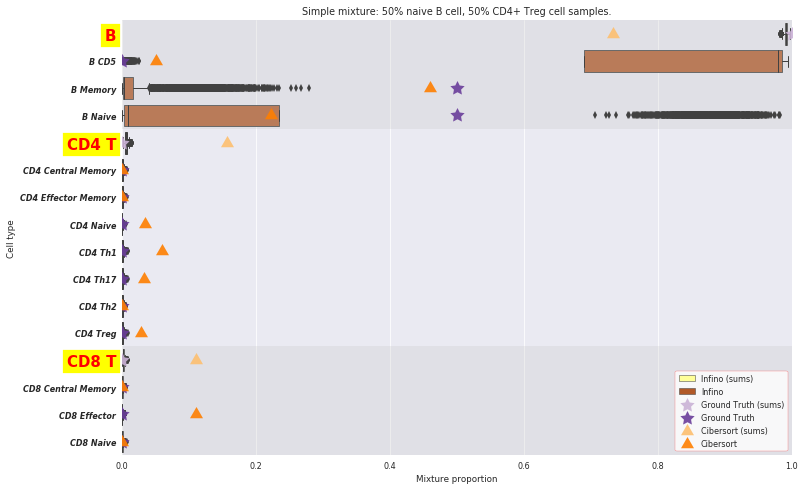

In [61]:
plot_single_mixture_results(extract_values_for_mixture_by_id(1),
                                   'Simple mixture: 50% naive B cell, 50% CD4+ Treg cell samples.')

rollups fix it.

(0, 1)

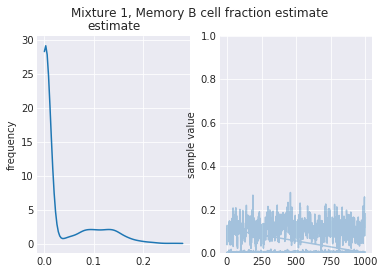

In [62]:
g = plots.traceplot(
    all_traces_df3[(all_traces_df3['sample_id'] == 1)
                   & (all_traces_df3['subset_name'] == 'B_Memory')].set_index(
                       'iter')[['estimate']],
    vars=['estimate'])
g.suptitle('Mixture 1, Memory B cell fraction estimate')
g.gca().set_ylim(0, 1)

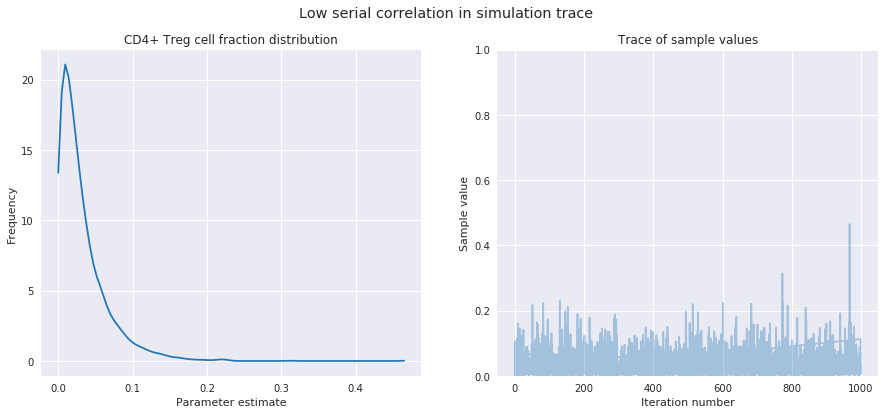

In [63]:
with sns.plotting_context('notebook'):
    g = plots.traceplot(all_traces_df3[(all_traces_df3['sample_id'] == 10) & (all_traces_df3['subset_name'] == 'CD4_Treg')]                        .set_index('iter')[['estimate']],
                        vars=['estimate'],
                       )
    g.set_size_inches((15,6))
    #g.suptitle('Mixture 10, CD4 Treg cell fraction estimate')
    g.suptitle('Low serial correlation in simulation trace')
    g.axes[0].set_ylabel('Frequency')
    g.axes[0].set_xlabel('Parameter estimate')
    g.axes[0].set_title('CD4+ Treg cell fraction distribution')
    g.axes[1].set_ylim(0,1)
    g.axes[1].set_ylabel('Sample value')
    g.axes[1].set_xlabel('Iteration number')
    g.axes[1].set_title('Trace of sample values')

In [64]:
# # correlation matrix

# not Omega_L
omega = stan_summary[stan_summary.name.str.startswith('Omega[')] 
omega.shape

(169, 10)

In [65]:
mean_matrix = omega['Mean'].values.reshape(13, 13)
omega_df = pd.DataFrame(mean_matrix, columns=subset_names).rename(
columns=lambda x: x.replace('_', ' '))
subset_names_cleaner = list(omega_df.columns)
omega_df

,B CD5,B Memory,B Naive,CD4 Central Memory,CD4 Effector Memory,CD4 Naive,CD4 Th1,CD4 Th17,CD4 Th2,CD4 Treg,CD8 Central Memory,CD8 Effector,CD8 Naive
0,1.000000,0.954243,0.960365,0.332703,0.245395,0.334823,0.309229,0.248150,0.258964,0.280491,0.280306,0.163913,0.274957
1,0.954243,1.000000,0.998127,0.480432,0.400416,0.473512,0.444107,0.403186,0.406434,0.408685,0.431007,0.268695,0.419109
2,0.960365,0.998127,1.000000,0.473634,0.388838,0.473922,0.435035,0.389489,0.391545,0.401258,0.421095,0.259571,0.422800
3,0.332703,0.480432,0.473634,1.000000,0.945470,0.946200,0.977675,0.961531,0.884371,0.944165,0.949793,0.813816,0.914297
4,0.245395,0.400416,0.388838,0.945470,1.000000,0.875197,0.971445,0.953392,0.893888,0.858635,0.991616,0.943426,0.889520
5,0.334823,0.473512,0.473922,0.946200,0.875197,1.000000,0.938711,0.911832,0.879155,0.813393,0.914436,0.751202,0.970195
6,0.309229,0.444107,0.435035,0.977675,0.971445,0.938711,1.000000,0.985304,0.922953,0.884445,0.977728,0.887315,0.908461
7,0.248150,0.403186,0.389489,0.961531,0.953392,0.911832,0.985304,1.000000,0.947708,0.871575,0.954182,0.844910,0.859309
8,0.258964,0.406434,0.391545,0.884371,0.893888,0.879155,0.922953,0.947708,1.000000,0.763057,0.916287,0.795479,0.825931
9,0.280491,0.408685,0.401258,0.944165,0.858635,0.813393,0.884445,0.871575,0.763057,1.000000,0.839189,0.716996,0.773934


In [66]:
subset_names_cleaner

['B CD5',
 'B Memory',
 'B Naive',
 'CD4 Central Memory',
 'CD4 Effector Memory',
 'CD4 Naive',
 'CD4 Th1',
 'CD4 Th17',
 'CD4 Th2',
 'CD4 Treg',
 'CD8 Central Memory',
 'CD8 Effector',
 'CD8 Naive']

In [67]:
omega_df.shape, mean_matrix.shape

((13, 13), (13, 13))

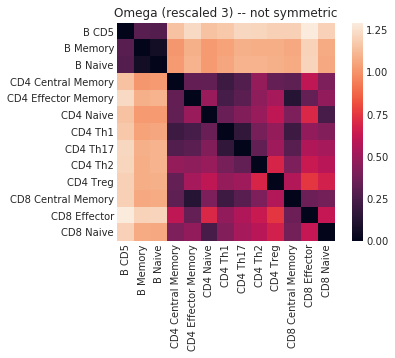

In [68]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
# make into distance matrix as suggested in links above
rescaled = np.sqrt(2*(1-mean_matrix))
#rescaled /= 2 # my own
g = sns.heatmap(rescaled, square=True,
                xticklabels=subset_names_cleaner,
                yticklabels=subset_names_cleaner
               )
plt.title('Omega (rescaled 3) -- not symmetric')

In [69]:
pdist = scipy.spatial.distance.squareform(rescaled)
pdist

array([ 0.30251281,  0.28154929,  1.15524629,  1.22849908,  1.15340973,
        1.17539015,  1.22625446,  1.21740379,  1.19959076,  1.19974497,
        1.29312567,  1.20419517,  0.06120457,  1.0193802 ,  1.09506529,
        1.02614619,  1.05441263,  1.09253284,  1.08955587,  1.08748793,
        1.06676427,  1.20938414,  1.07785992,  1.02602729,  1.10558763,
        1.02574656,  1.06298166,  1.10499864,  1.10313644,  1.09429612,
        1.0760158 ,  1.21690509,  1.07443008,  0.33024234,  0.32802439,
        0.21130547,  0.277377  ,  0.48089292,  0.33417062,  0.31688168,
        0.61021963,  0.41401208,  0.49960584,  0.23897699,  0.30531295,
        0.46067776,  0.53172361,  0.12949131,  0.33637479,  0.47006383,
        0.35011141,  0.4199238 ,  0.49161977,  0.61091243,  0.4136762 ,
        0.70540485,  0.24415159,  0.17144095,  0.39254809,  0.48073901,
        0.2110545 ,  0.4747315 ,  0.42787615,  0.3233945 ,  0.50680371,
        0.30271439,  0.55693806,  0.53045452,  0.68839378,  0.40

In [70]:
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
links = linkage(pdist, 'ward') # row i is which clusters were merged in i-th iteration, their distance, and their sample count
print(links)
from scipy.cluster.hierarchy import cophenet
c, _ = cophenet(links, pdist)
c # want close to 1: means actual pairwise distances well preserved by hierarchical clustering

[[  1.           2.           0.06120457   2.        ]
 [  4.          10.           0.12949131   2.        ]
 [  6.           7.           0.17144095   2.        ]
 [  5.          12.           0.24415159   2.        ]
 [  3.          15.           0.26694818   3.        ]
 [  0.          13.           0.33557016   3.        ]
 [ 14.          17.           0.38479848   5.        ]
 [  8.          19.           0.49559405   6.        ]
 [ 11.          20.           0.61018959   7.        ]
 [  9.          21.           0.67122239   8.        ]
 [ 16.          22.           0.71542162  10.        ]
 [ 18.          23.           2.31106738  13.        ]]


0.96378102869868354

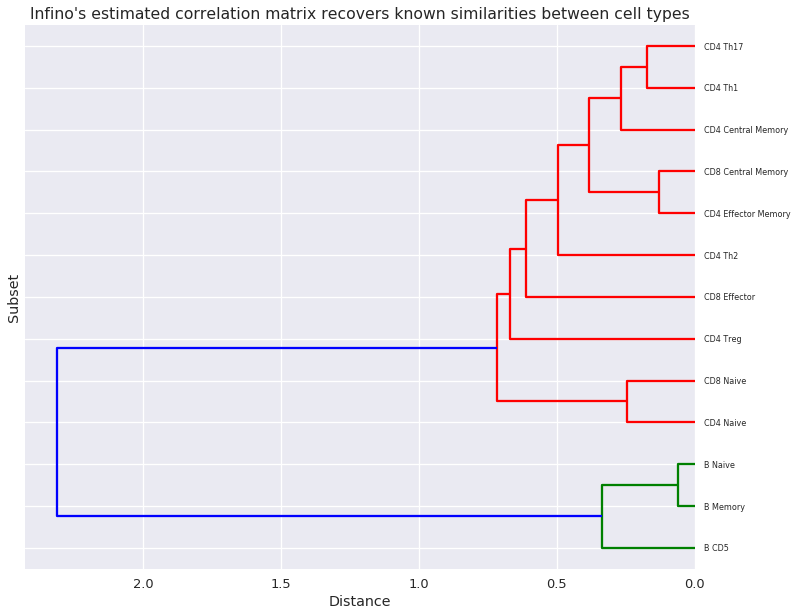

In [71]:

# plt.figure(figsize=(25, 10))
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(
#     links,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
#     labels=colnames_filtered
# )

with sns.plotting_context('talk'):
    f = plt.figure(figsize=(12, 10))
    dendrogram(
        links,
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels=subset_names_cleaner,
        orientation='left'
    )
    plt.xlabel('Distance')
    plt.ylabel('Subset')


    #plt.title('Hierarchical clustering dendrogram from correlation matrix')
    #plt.title("Model's estimated correlation matrix recovers known biological similarities between cell types")
    plt.title("Infino's estimated correlation matrix recovers known similarities between cell types")
    savefig(f, PLOT_DIR+'dendrogram.png', dpi=300)
    savefig(f, PLOT_DIR+'dendrogram.pdf', dpi=300)


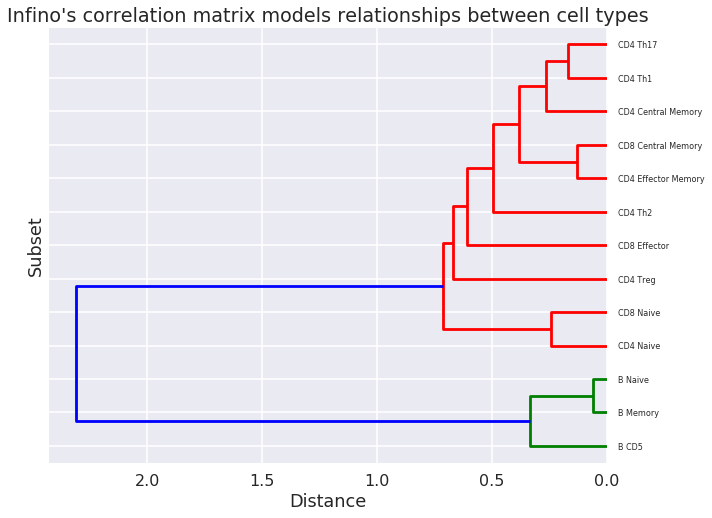

In [72]:
# portrait version


# plt.figure(figsize=(25, 10))
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(
#     links,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
#     labels=colnames_filtered
# )

with sns.plotting_context('poster'):
    f = plt.figure(figsize=(10, 8))
    dendrogram(
        links,
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels=subset_names_cleaner,
        orientation='left'
    )
    plt.xlabel('Distance')
    plt.ylabel('Subset')


    #plt.title('Hierarchical clustering dendrogram from correlation matrix')
    #plt.title("Model's estimated correlation matrix recovers known biological similarities between cell types")
    plt.title("Infino's correlation matrix models relationships between cell types")


Flip from Distance to Similarity:

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
<class 'float'>


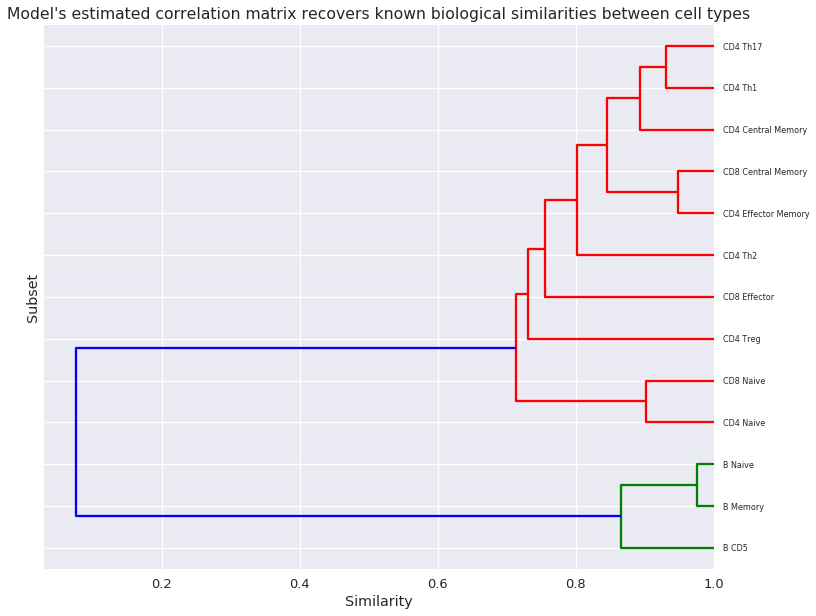

In [73]:
# similarity version

with sns.plotting_context('talk'):
    f = plt.figure(figsize=(12, 10))
    dendrogram(
        links,
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels=subset_names_cleaner,
        orientation='left'
    )
    #plt.xlabel('Distance')
    plt.ylabel('Subset')


    #plt.title('Hierarchical clustering dendrogram from correlation matrix')
    plt.title("Model's estimated correlation matrix recovers known biological similarities between cell types")
    
    #plt.gca().invert_xaxis()
    ax = plt.gca()
#     lbls = plt.gca().get_xticklabels()
#     labels = [t.get_text() for t in plt.gca().get_xticklabels()]
    #labelsrev = list(reversed(labels))
    #ax.set_xticklabels(labelsrev)
    labels = ax.get_xticks().tolist()
    print(labels)
    print(type(labels[0]))
    
    # normalize
    labels_normed = [c / labels[-1] for c in labels]
    
    labelsrev = list(reversed(labels_normed))
    ax.set_xticklabels(labelsrev)
    
    plt.xlabel('Similarity')



Not sure if this is as interpretable. Distance between two items is easy. But how do you subtract similarities?

# Cibersort's diagnostics

In [74]:
print('Cibersort Diagnostics for hyper (inserted in google doc):')
for key,row in example_result[['RMSE', 'P-value']].iterrows():
    print("mixture %d" % (key+1))
    print("{{{mix%d_rmse:%0.2f}}}" % (key+1, row['RMSE']))
    print("{{{mix%d_pval:%0.1f}}}" % (key+1, row['P-value']))
example_result[['RMSE', 'P-value']].iloc[[6,1,9]]

Cibersort Diagnostics for hyper (inserted in google doc):
mixture 1
{{{mix1_rmse:0.28}}}
{{{mix1_pval:0.0}}}
mixture 2
{{{mix2_rmse:0.34}}}
{{{mix2_pval:0.0}}}
mixture 3
{{{mix3_rmse:0.30}}}
{{{mix3_pval:0.0}}}
mixture 4
{{{mix4_rmse:0.33}}}
{{{mix4_pval:0.0}}}
mixture 5
{{{mix5_rmse:0.27}}}
{{{mix5_pval:0.0}}}
mixture 6
{{{mix6_rmse:0.34}}}
{{{mix6_pval:0.0}}}
mixture 7
{{{mix7_rmse:0.45}}}
{{{mix7_pval:0.0}}}
mixture 8
{{{mix8_rmse:0.44}}}
{{{mix8_pval:0.0}}}
mixture 9
{{{mix9_rmse:0.41}}}
{{{mix9_pval:0.0}}}
mixture 10
{{{mix10_rmse:0.49}}}
{{{mix10_pval:0.0}}}


,RMSE,P-value
6,0.452792,0.0
1,0.339896,0.0
9,0.486806,0.0
